In [1]:
import requests
import zipfile
import os
import numpy as np
import pandas as pd
import os

In [2]:
import re
import re
import urllib.request
from bs4 import BeautifulSoup

In [97]:
pd.set_option('float_format', '{:6.6f}'.format)
np.set_printoptions(precision=3, suppress=True)
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
url = 'https://drive.google.com/uc?export=download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM'
dirname = '../data/'
path = dirname + 'file.zip'

os.makedirs(dirname, exist_ok=True)
if not os.path.isfile(path):
    response = requests.get(url)
    with open(path, "wb") as file:
        file.write(response.content)


zf = zipfile.ZipFile(path)
files = zf.namelist()

print(files)


['DeveloperSurvey2017QuestionaireCleaned.pdf', '__MACOSX/', '__MACOSX/._DeveloperSurvey2017QuestionaireCleaned.pdf', 'README_2017.txt', '__MACOSX/._README_2017.txt', 'survey_results_public.csv', 'survey_results_schema.csv']


In [5]:
survey_results = pd.read_csv( zf.open(files[5]))

In [6]:
survey_results.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.000000,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.000000,Desktop; iOS a

In [7]:
survey_schema =pd.read_csv( zf.open(files[6]))

In [8]:
survey_schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


Сколько вопросов было в опросе? Сколько разработчиков приняло участие в нем?

In [9]:
len(survey_results)

51392

In [10]:
len(survey_schema)

154

In [92]:
survey_results_respondents=    pd.DataFrame(survey_results.Country.value_counts()[0:10])

In [93]:
survey_results_respondents.columns=['Number']

In [95]:
survey_results_respondents['Ratio'] = survey_results.Country.value_counts()[0:10]/len(survey_results.Country)

In [99]:
print(survey_results_respondents)

                    Number    Ratio
United States        11455 0.222895
India                 5197 0.101125
United Kingdom        4395 0.085519
Germany               4143 0.080616
Canada                2233 0.043450
France                1740 0.033857
Poland                1290 0.025101
Australia              913 0.017765
Russian Federation     873 0.016987
Spain                  864 0.016812


In [102]:
sum(survey_results_respondents.Ratio)

0.644127490660025

In [13]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html, 'html.parser') #class object creation

In [14]:
tables = soup.find("table", { "class" : "wikitable sortable" })
T = []
line = []

for row in tables.findAll("tr"):
    cells = row.findAll("td")
    line = []
    for i in range(len(cells)):
        line.append(cells[i].text)
    T.append(line)
    
T = pd.DataFrame(T)
#удалим ненужные строки и столбцы
T = T.loc[1: , ]
del T[0]
del T[3]
del T[4]
del T[5]

In [15]:
T = T.reset_index(drop = True)

In [16]:
T.columns = ['Country', 'Population']

In [17]:
T

,Country,Population
0,China[Note 2],"1,389,190,000"
1,India[Note 3],"1,327,810,000"
2,United States[Note 4],"326,615,000"
3,Indonesia,"261,890,900"
4,Pakistan,"210,564,000"
5,Brazil,"208,651,000"
6,Nigeria,"193,392,500"
7,Bangladesh,"163,984,000"
8,Russia[Note 5],"146,877,088"
9,Japan,"126,590,000"


In [18]:
#удалить Notes 1 -23
for c in (T.index) :
    if  T.loc[c].Country.find('Note') > 0   :
        new = ( re.sub("[\(\[].*?[\)\]]", "", str(T.loc[c].Country))  )
        T.loc[c].Country = new

In [20]:
T.Population = T.Population.apply( lambda row: re.sub( ',', "",row ) )

In [21]:
T.Population = T.Population.astype(float)

In [22]:
T.Country = T.Country.apply( lambda row: row[1:]  )

In [24]:
T = T.set_index('Country', drop = True)

In [25]:
T.head()

,Population
Country,
China,1389190000.000000
India,1327810000.000000
United States,326615000.000000
Indonesia,261890900.000000
Pakistan,210564000.000000


In [26]:
T.index.rename(None, inplace=True)

In [27]:
Country_value_counts   = pd.DataFrame(survey_results.Country.value_counts())

In [28]:
Country_value_counts.columns = ['Responces']

In [29]:
Country_value_counts.head( ) 

,Responces
United States,11455
India,5197
United Kingdom,4395
Germany,4143
Canada,2233


In [30]:
Country_value_counts.loc['United States']

Responces    11455
Name: United States, dtype: int64

In [31]:
#T.index =   T.reset_index()['index'].apply( lambda row: re.sub( ' ', "",row ) )

In [32]:
T.index

Index(['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil',
       'Nigeria', 'Bangladesh', 'Russia', 'Japan',
       ...
       'Saint Helena, Ascension\nand Tristan da Cunha (UK)', 'Montserrat (UK)',
       'Falkland Islands (UK)', 'Norfolk Island (Australia)',
       'Christmas Island (Australia)', 'Niue (NZ)', 'Tokelau (NZ)',
       'Vatican City', 'Cocos (Keeling) Islands (Australia)',
       'Pitcairn Islands (UK)'],
      dtype='object', length=240)

In [35]:
T.loc['Russia']

Population   146877088.000000
Name: Russia, dtype: float64

In [36]:
#Russian Federation Slovak Republic Hong Kong Bosnia-Herzegovina Moldavia Azerbaidjan	

In [37]:
ratio_table = Country_value_counts.join( T )

In [38]:
ratio_table.head()

,Responces,Population
United States,11455,326615000.000000
India,5197,1327810000.000000
United Kingdom,4395,65648000.000000
Germany,4143,82521653.000000
Canada,2233,37015700.000000


In [39]:
ratio_table['Ratio'] =ratio_table.Responces / ratio_table.Population

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline

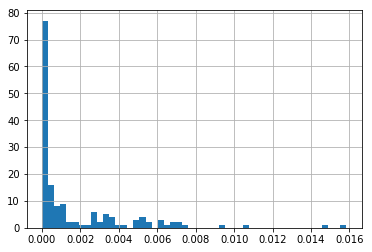

In [111]:
(ratio_table['Ratio']*100).hist(bins = 50)

In [103]:
answer3 = ratio_table[ratio_table.Responces >100].sort_values(by='Ratio', ascending= False) [0:10]

In [104]:
print( answer3)

                Responces      Population    Ratio
Slovenia              303  2065890.000000 0.000147
Ireland               345  4792500.000000 0.000072
Switzerland           595  8465234.000000 0.000070
United Kingdom       4395 65648000.000000 0.000067
Israel                575  8815980.000000 0.000065
Lithuania             176  2807495.000000 0.000063
Sweden                611 10112669.000000 0.000060
Canada               2233 37015700.000000 0.000060
Austria               477  8823054.000000 0.000054
Finland               287  5509984.000000 0.000052


In [41]:
survey_results.VersionControl.value_counts()

Git                                            21266
Subversion                                      2790
Team Foundation Server                          2255
I don't use version control                     1468
I use some other system                          924
Zip file back-ups                                609
Mercurial                                        591
Copying and pasting files to network shares      510
Visual Source Safe                               196
Rational ClearCase                               121
Name: VersionControl, dtype: int64

In [42]:
survey_results.HaveWorkedLanguage[1]

'JavaScript; Python; Ruby; SQL'

In [43]:
s = survey_results.HaveWorkedLanguage[1]

In [44]:
s

'JavaScript; Python; Ruby; SQL'

In [45]:
languages = set([])

In [50]:
def get_uniq_words ( row):
    if pd.isnull(row):
        return( set())
    else:
        return (set(re.split(';',    row.replace('; ', ';')) ))

In [51]:
get_uniq_words(survey_results.HaveWorkedLanguage[12])

{'C', 'C++', 'Java'}

In [53]:
survey_results.apply(  lambda row:  languages.update(   get_uniq_words ( row.HaveWorkedLanguage   )      
                                        ) , axis = 1)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
30       None
31       None
32       None
33       None
34       None
35       None
36       None
37       None
38       None
39       None
40       None
41       None
42       None
43       None
44       None
45       None
46       None
47       None
48       None
49       None
50       None
51       None
52       None
53       None
54       None
55       None
56       None
57       None
58       None
59       None
60       None
61       None
62       None
63       None
64       None
65       None
66       None
67       None
68       None
69       None
70       None
71    

In [114]:
print(list(languages))

['VBA', 'Java', 'Objective-C', 'Ruby', 'CoffeeScript', 'Erlang', 'Swift', 'Hack', 'Elixir', 'Go', 'F#', 'Julia', 'C', 'Haskell', 'Assembly', 'TypeScript', 'Lua', 'Groovy', 'R', 'Clojure', 'Visual Basic 6', 'Python', 'C++', 'Perl', 'PHP', 'VB.NET', 'Matlab', 'Scala', 'Dart', 'C#', 'Common Lisp', 'Smalltalk', 'SQL', 'JavaScript', 'Rust']


In [55]:
#теперь для каждого языка

In [56]:
languages =list(languages)

In [57]:
def coun_word_in_df ( word , string):
    if pd.isnull(string):
        return( 0 )
    else:
        return ( (word in get_uniq_words(string))*1 )

In [58]:
sum(survey_results.HaveWorkedLanguage.apply( lambda row: coun_word_in_df ( languages[4] , row)   ))

1192

In [59]:
def language_count ( lang):
    s = sum(survey_results.HaveWorkedLanguage.apply( lambda row: coun_word_in_df ( lang , row)   ))
    return s

In [60]:
d = { 'counts': [0]*len(languages) , 'languages': languages}
df = pd.DataFrame(data=d)

In [61]:
df = df.set_index('languages', drop=True)

In [62]:
language_count( df.index[0] )

1574

In [63]:
df

,counts
languages,
VBA,0
Java,0
Objective-C,0
Ruby,0
CoffeeScript,0
Erlang,0
Swift,0
Hack,0
Elixir,0


In [64]:
for i in df.index:
    df.loc[i , 'counts' ] =  (language_count( i))

In [65]:
df

,counts
languages,
VBA,1574
Java,14524
Objective-C,2349
Ruby,3324
CoffeeScript,1192
Erlang,281
Swift,2368
Hack,107
Elixir,380


In [115]:
answer6= df.sort_values(by = 'counts', ascending=False)[0:10]

In [116]:
print( answer6)

            counts
languages         
JavaScript   22875
SQL          18754
Java         14524
C#           12476
Python       11704
PHP          10290
C++           8155
C             6974
TypeScript    3488
Ruby          3324


In [67]:
for i in languages:
    survey_results[i] = survey_results.HaveWorkedLanguage.apply( lambda row: coun_word_in_df ( i , row)   )

In [68]:
c_index = survey_results.Country.value_counts()[0:10].index

In [69]:
survey_results.groupby('Country').sum().loc[c_index , languages]

,VBA,Java,Objective-C,Ruby,CoffeeScript,Erlang,Swift,Hack,Elixir,Go,F#,Julia,C,Haskell,Assembly,TypeScript,Lua,Groovy,R,Clojure,Visual Basic 6,Python,C++,Perl,PHP,VB.NET,Matlab,Scala,Dart,C#,Common Lisp,Smalltalk,SQL,JavaScript,Rust
United States,404,3191,655,1123,304,61,692,27,102,473,112,42,1534,145,418,832,253,315,538,120,233,3348,1837,560,1827,611,380,345,39,3100,71,83,4589,5699,128
India,69,1378,186,147,34,10,144,6,12,55,7,8,817,18,167,158,21,46,100,10,115,735,694,61,885,150,107,68,6,658,13,13,1373,1580,8
United Kingdom,214,940,181,307,99,34,180,13,38,128,85,11,441,57,113,361,82,104,123,41,110,1038,570,139,888,307,102,126,9,1386,20,16,1849,2214,32
Germany,154,1458,182,248,98,20,197,5,30,136,28,13,688,81,182,295,123,120,152,30,71,947,868,154,937,130,146,116,13,953,25,43,1450,1770,54
Canada,96,613,114,174,70,10,130,3,16,86,26,5,308,29,86,176,53,63,65,28,52,620,407,93,424,135,59,60,10,647,9,18,872,1104,21
France,54,496,66,114,51,12,66,6,14,61,14,3,343,18,82,129,39,47,53,10,18,437,342,70,439,45,47,57,7,310,18,23,631,807,12
Poland,30,351,50,81,45,11,48,1,13,51,18,7,147,19,44,100,30,49,40,11,8,292,228,29,230,19,42,51,3,292,9,2,439,563,8
Australia,37,229,45,66,27,1,58,2,11,24,11,4,107,13,28,91,26,23,23,8,18,211,126,31,177,47,20,21,5,298,4,5,384,476,12
Russian Federation,20,184,36,50,29,9,32,0,8,35,8,0,102,15,21,56,28,23,20,9,7,204,149,19,134,17,13,28,0,171,1,3,263,313,10
Spain,23,285,34,44,20,3,29,0,2,27,3,2,104,14,28,52,18,19,29,4,25,197,112,25,194,35,26,19,2,141,2,2,308,390,6


In [70]:
survey_results.groupby('Country').sum().loc[c_index , languages]

,VBA,Java,Objective-C,Ruby,CoffeeScript,Erlang,Swift,Hack,Elixir,Go,F#,Julia,C,Haskell,Assembly,TypeScript,Lua,Groovy,R,Clojure,Visual Basic 6,Python,C++,Perl,PHP,VB.NET,Matlab,Scala,Dart,C#,Common Lisp,Smalltalk,SQL,JavaScript,Rust
United States,404,3191,655,1123,304,61,692,27,102,473,112,42,1534,145,418,832,253,315,538,120,233,3348,1837,560,1827,611,380,345,39,3100,71,83,4589,5699,128
India,69,1378,186,147,34,10,144,6,12,55,7,8,817,18,167,158,21,46,100,10,115,735,694,61,885,150,107,68,6,658,13,13,1373,1580,8
United Kingdom,214,940,181,307,99,34,180,13,38,128,85,11,441,57,113,361,82,104,123,41,110,1038,570,139,888,307,102,126,9,1386,20,16,1849,2214,32
Germany,154,1458,182,248,98,20,197,5,30,136,28,13,688,81,182,295,123,120,152,30,71,947,868,154,937,130,146,116,13,953,25,43,1450,1770,54
Canada,96,613,114,174,70,10,130,3,16,86,26,5,308,29,86,176,53,63,65,28,52,620,407,93,424,135,59,60,10,647,9,18,872,1104,21
France,54,496,66,114,51,12,66,6,14,61,14,3,343,18,82,129,39,47,53,10,18,437,342,70,439,45,47,57,7,310,18,23,631,807,12
Poland,30,351,50,81,45,11,48,1,13,51,18,7,147,19,44,100,30,49,40,11,8,292,228,29,230,19,42,51,3,292,9,2,439,563,8
Australia,37,229,45,66,27,1,58,2,11,24,11,4,107,13,28,91,26,23,23,8,18,211,126,31,177,47,20,21,5,298,4,5,384,476,12
Russian Federation,20,184,36,50,29,9,32,0,8,35,8,0,102,15,21,56,28,23,20,9,7,204,149,19,134,17,13,28,0,171,1,3,263,313,10
Spain,23,285,34,44,20,3,29,0,2,27,3,2,104,14,28,52,18,19,29,4,25,197,112,25,194,35,26,19,2,141,2,2,308,390,6


In [131]:
m = survey_results.groupby('Country').sum().loc[c_index , languages]

In [118]:
answer7 = survey_results.groupby('Country').sum().loc[c_index , languages].idxmax(axis=1)

In [126]:
answer7 = pd.DataFrame(answer7)
answer7.columns = ['Language']

In [127]:
answer7

,Language
United States,JavaScript
India,JavaScript
United Kingdom,JavaScript
Germany,JavaScript
Canada,JavaScript
France,JavaScript
Poland,JavaScript
Australia,JavaScript
Russian Federation,JavaScript
Spain,JavaScript


In [130]:
survey_results.groupby('Country')

In [119]:
answer7

United States         JavaScript
India                 JavaScript
United Kingdom        JavaScript
Germany               JavaScript
Canada                JavaScript
France                JavaScript
Poland                JavaScript
Australia             JavaScript
Russian Federation    JavaScript
Spain                 JavaScript
dtype: object

In [72]:
p =survey_results.groupby('Country').sum().loc[survey_results.Country.value_counts().index, languages].idxmax(axis=1)

In [73]:
p[p!='JavaScript'][0:10]

South Korea     Java
Albania          SQL
Morocco          SQL
Lebanon          SQL
Saudi Arabia     SQL
Malta             C#
Jordan           SQL
Ethiopia         PHP
Myanmar         Java
Uzbekistan       SQL
dtype: object

In [74]:
p[p!='JavaScript'].index[0]

'South Korea'

8. Придумайте интересный для вас вопрос, относящийся к исследуемому набору данных,
и ответьте на него. Оригинальность вопроса поощряется.

In [75]:
survey_results.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary,VBA,Java,Objective-C,Ruby,CoffeeScript,Erlang,Swift,Hack,Elixir,Go,F#,Julia,C,Haskell,Assembly,TypeScript,Lua,Groovy,R,Clojure,Visual Basic 6,Python,C++,Perl,PHP,VB.NET,Matlab,Scala,Dart,C#,Common Lisp,Smalltalk,SQL,JavaScript,Rust
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.000000,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [76]:
survey_results.Salary

0                 nan
1                 nan
2       113750.000000
3                 nan
4                 nan
5                 nan
6                 nan
7                 nan
8                 nan
9                 nan
10                nan
11                nan
12                nan
13                nan
14      100000.000000
15                nan
16                nan
17      130000.000000
18       82500.000000
19                nan
20                nan
21                nan
22      100764.000000
23                nan
24                nan
25      175000.000000
26                nan
27                nan
28                nan
29                nan
30                nan
31                nan
32                nan
33                nan
34       14838.709677
35                nan
36       28200.000000
37      118279.569892
38                nan
39                nan
40                nan
41                nan
42                nan
43                nan
44                nan
45        

In [77]:
Salary_table =   survey_results.groupby('Country').count().Salary

In [78]:
Salary_table = pd.DataFrame(Salary_table)
Salary_table.columns = ['Counts']

In [79]:
Salary_table['Mean_Salary'] =     survey_results.groupby('Country').mean().Salary

In [80]:
Salary_table['Std_Salary'] =     survey_results.groupby('Country').std().Salary

In [81]:
Salary_table['Median_Salary'] =     survey_results.groupby('Country').median().Salary

In [82]:
Salary_table_100 =    Salary_table[Salary_table.Counts > 100].sort_values( by ='Mean_Salary', ascending = False )

In [84]:
pd.set_option('float_format', '{:6.0f}'.format)

In [85]:
print( Salary_table_100)

                    Counts  Mean_Salary  Std_Salary  Median_Salary
Country                                                           
United States         3781        96195       34866          93000
Switzerland            150        91190       36940          90000
Australia              256        69216       25825          66856
Israel                 151        62686       38556          70000
Canada                 667        56925       21462          53030
United Kingdom        1386        52602       22839          48750
Germany                994        51616       21880          52903
Netherlands            216        49026       21747          48387
Sweden                 195        48765       23598          49548
Austria                132        45299       17789          45161
France                 477        42879       18836          40860
Spain                  278        33564       16435          32258
Italy                  201        31255       13823          2